In [14]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
preamble = """\\usepackage[T2A]{fontenc}
\\usepackage[utf8]{inputenc}
\\usepackage[bulgarian]{babel}
\\usepackage[]{siunitx}"""
LaTeX = {
    "text.usetex": True,
    "font.family": "serif",
    "text.latex.preamble": preamble
}
plt.rcParams.update(LaTeX)

# очевидно това е размера на шрифта без значение какъв е той
plt.rcParams["font.size"] = 20
from uncertainties import ufloat

In [15]:
data = pd.DataFrame(pd.read_csv("surface_tension.csv"))

data = data.iloc[1:10, :7].astype(float)

rho = ufloat(997, 0.1)
g = ufloat(9.81, 0.01)
R = ufloat(0.563, 0.001) * 1/2000 


In [16]:
col_lengths = data.notnull().sum()
average = {key: data[key].mean()/1000 for key in data.columns}
errors = {key: (1/1000**2 + (2*data[key].std()/1000)**2/col_lengths[key])**0.5  for key in data.columns}
coeffs = {key: rho*g*R*ufloat(average[key], errors[key])/2 for key in data.columns}

B = 1/1000*72.75/(1/1000*ufloat(average['h2o dest'], errors['h2o dest']))
print(f"B: {B} si")
plt.figure(figsize=(10, 10))
print(coeffs['h2o dest'])
columns = [
    "$H_2 O$", 
    "$10\%$",
    "$20\%$",
    "$30\%$",
    "$40\%$",
    "$50\%$",
    "$X\%$",
]

fig, ax = plt.subplots(figsize=(10, 10))

bars = ax.bar(x=columns, height=[1000*coeffs[k].nominal_value for k in data.columns], yerr=[1000*coeffs[k].std_dev for k in data.columns])
ax.bar_label(bars, fmt="%.2f")
plt.ylabel("$\sigma, \ \si{mJ m^{-2}}$")


AttributeError: 'float' object has no attribute 'strip'

[0.07403130778999999, 0.05552348084249999, 0.05322912212999998, 0.05093476341749999, 0.03854522636999999, 0.03166215023249999]
[-7.76116403981479e-07, 6.13771304253967e-05, -0.0019790563652724857, 0.03167274652158735]
[41.24830029 +0.j         18.91703859+25.12970625j
 18.91703859-25.12970625j]


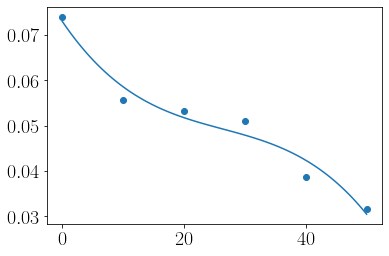

In [8]:
xs = [0, 10, 20, 30, 40, 50]
ys = [coeffs[col].nominal_value for col in data.columns[:-1]]
print(ys)

degree = 3
poly_coeffs = np.polyfit(xs, ys, deg=degree)

plt.scatter(xs, ys)
new_xs = np.linspace(start=0, stop=50, num=100)
plt.plot(new_xs, [sum([poly_coeffs[i]*x**(degree-i) for i in range(degree + 1)]) for x in new_xs])
new_coeffs = list(poly_coeffs[:-1])
new_coeffs.append(poly_coeffs[-1] - 41.3/1000)
print(new_coeffs)
print(np.roots(new_coeffs))